In [ ]:
!pip install tensorflow keras imgaug opencv-python pandas scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 10.4 MB/s eta 0:00:00


In [ ]:
!pip install imgaug --no-deps

In [ ]:
!pip install numpy==1.26.4
!pip install --upgrade imgaug


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install albumentations
import albumentations as A


In [ ]:
!pip install numpy==1.26.4


In [ ]:
!pip install --upgrade imgaug


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense  # Corrected Convolution2D -> Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files

uploaded = files.upload()  # Select your 3 images when prompted


Saving driving_log.csv to driving_log.csv


In [ ]:
from google.colab import files

uploaded = files.upload()  # Select your 3 images when prompted


Saving center_2021_12_19_18_46_10_430.jpg to center_2021_12_19_18_46_10_430.jpg
Saving left_2021_12_19_18_46_10_430.jpg to left_2021_12_19_18_46_10_430.jpg
Saving right_2021_12_19_18_46_10_430.jpg to right_2021_12_19_18_46_10_430.jpg


In [ ]:
import os

# List files in the current directory
print(os.listdir("/content/"))


['.config', 'left_2021_12_19_18_46_10_430.jpg', 'driving_log.csv', 'right_2021_12_19_18_46_10_430.jpg', 'center_2021_12_19_18_46_10_430.jpg', 'sample_data']


In [ ]:
import pandas as pd

csv_path = "/content/driving_log.csv"
columns = ["center", "left", "right", "steering", "throttle", "reverse", "speed"]

# Load CSV into a DataFrame
data = pd.read_csv(csv_path, names=columns)

# Show first few rows
print(data.head())


                                              center  \
0  /Users/asik/Desktop/Self Driving Car/IMG/cente...   
1  /Users/asik/Desktop/Self Driving Car/IMG/cente...   
2  /Users/asik/Desktop/Self Driving Car/IMG/cente...   
3  /Users/asik/Desktop/Self Driving Car/IMG/cente...   
4  /Users/asik/Desktop/Self Driving Car/IMG/cente...   

                                                left  \
0   /Users/asik/Desktop/Self Driving Car/IMG/left...   
1   /Users/asik/Desktop/Self Driving Car/IMG/left...   
2   /Users/asik/Desktop/Self Driving Car/IMG/left...   
3   /Users/asik/Desktop/Self Driving Car/IMG/left...   
4   /Users/asik/Desktop/Self Driving Car/IMG/left...   

                                               right  steering  throttle  \
0   /Users/asik/Desktop/Self Driving Car/IMG/righ...       0.0       0.0   
1   /Users/asik/Desktop/Self Driving Car/IMG/righ...       0.0       0.0   
2   /Users/asik/Desktop/Self Driving Car/IMG/righ...       0.0       0.0   
3   /Users/asik/Deskto

In [ ]:
# Update paths to match Colab directory
data["center"] = data["center"].apply(lambda x: "/content/" + x.split('/')[-1])
data["left"] = data["left"].apply(lambda x: "/content/" + x.split('/')[-1])
data["right"] = data["right"].apply(lambda x: "/content/" + x.split('/')[-1])

# Check if paths are updated correctly
print(data.head())


                                        center  \
0  /content/center_2021_12_19_18_46_10_430.jpg   
1  /content/center_2021_12_19_18_46_10_551.jpg   
2  /content/center_2021_12_19_18_46_10_723.jpg   
3  /content/center_2021_12_19_18_46_10_830.jpg   
4  /content/center_2021_12_19_18_46_10_980.jpg   

                                        left  \
0  /content/left_2021_12_19_18_46_10_430.jpg   
1  /content/left_2021_12_19_18_46_10_551.jpg   
2  /content/left_2021_12_19_18_46_10_723.jpg   
3  /content/left_2021_12_19_18_46_10_830.jpg   
4  /content/left_2021_12_19_18_46_10_980.jpg   

                                        right  steering  throttle  reverse  \
0  /content/right_2021_12_19_18_46_10_430.jpg       0.0       0.0      0.0   
1  /content/right_2021_12_19_18_46_10_551.jpg       0.0       0.0      0.0   
2  /content/right_2021_12_19_18_46_10_723.jpg       0.0       0.0      0.0   
3  /content/right_2021_12_19_18_46_10_830.jpg       0.0       0.0      0.0   
4  /content/right_20

In [ ]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data["steering"], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


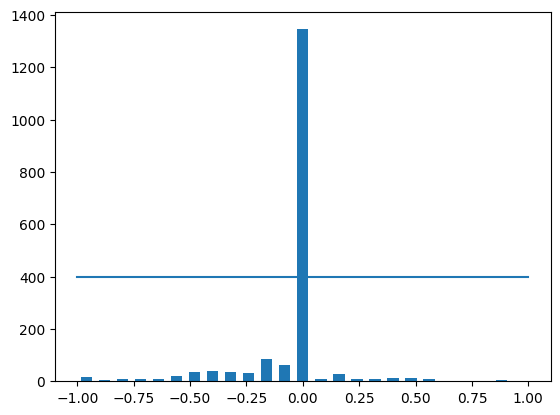

In [ ]:
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot(
    (np.min(data["steering"]), np.max(data["steering"])),
    (samples_per_bin, samples_per_bin),
)


In [ ]:
print("Total Data:", len(data))

Total Data: 1795


In [ ]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data["steering"])):
        if data["steering"][i] >= bins[j] and data["steering"][i] <= bins[j + 1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
print("Removed:", len(remove_list))

Removed: 945


In [ ]:
data.drop(data.index[remove_list], inplace=True)
print("Remaining:", len(data))

Remaining: 850


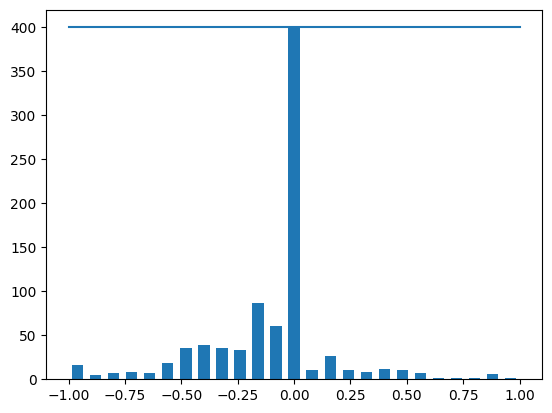

In [ ]:
hist, _ = np.histogram(data["steering"], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot(
    (np.min(data["steering"]), np.max(data["steering"])),
    (samples_per_bin, samples_per_bin),
)

In [ ]:
print(data.iloc[1])

center      /content/center_2021_12_19_18_46_10_980.jpg
left          /content/left_2021_12_19_18_46_10_980.jpg
right        /content/right_2021_12_19_18_46_10_980.jpg
steering                                            0.0
throttle                                            0.0
reverse                                             0.0
speed                                          0.000079
Name: 4, dtype: object


In [ ]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data[3]) + 0.15)
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data[3]) - 0.15)
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

In [ ]:
data_dir = "/content"  # Change 'dir' to 'data_dir'
image_paths, steerings = load_img_steering(data_dir + "/IMG", data)  # Use data_dir

X_train, X_valid, y_train, y_valid = train_test_split(
    image_paths, steerings, test_size=0.2, random_state=6
)

print("Training Samples: {}\nValid Samples: {}".format(len(X_train), len(X_valid)))


Training Samples: 2040
Valid Samples: 510


Text(0.5, 1.0, 'Validation set')

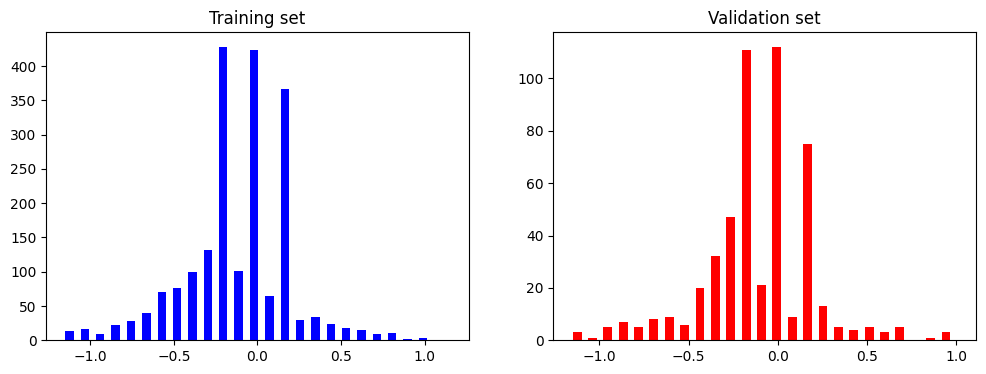

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color="blue")
axes[0].set_title("Training set")
axes[1].hist(y_valid, bins=num_bins, width=0.05, color="red")
axes[1].set_title("Validation set")

In [ ]:
import glob

# Get the list of uploaded images
image_paths = glob.glob("/content/*.jpg")

print("Images found:", image_paths)  # Check if paths are correct


Images found: ['/content/left_2021_12_19_18_46_10_430.jpg', '/content/right_2021_12_19_18_46_10_430.jpg', '/content/center_2021_12_19_18_46_10_430.jpg']


Using image: /content/left_2021_12_19_18_46_10_430.jpg


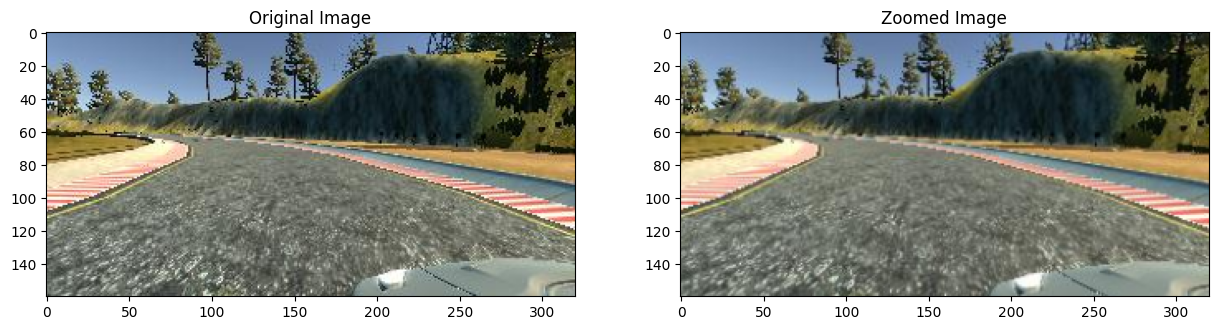

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imgaug import augmenters as iaa

def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

# Ensure `image_paths` is not empty
if len(image_paths) == 0:
    print("No images found! Check your file paths.")
else:
    # Select a random image
    image_path = random.choice(image_paths)
    print("Using image:", image_path)

    # Read and process the image
    original_image = mpimg.imread(image_path)
    zoomed_image = zoom(original_image)

    # Display the images
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")

    axs[1].imshow(zoomed_image)
    axs[1].set_title("Zoomed Image")

    plt.show()


Using image: /content/left_2021_12_19_18_46_10_430.jpg


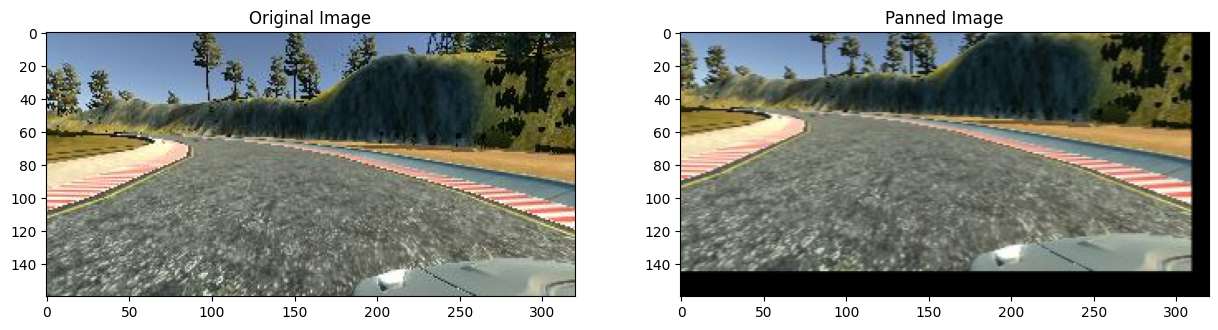

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
import glob

# Get the list of uploaded images
image_paths = glob.glob("/content/*.jpg")

# Ensure `image_paths` is not empty
if len(image_paths) == 0:
    print("No images found! Check your file paths.")
else:
    # Select a random image from available images
    image_path = random.choice(image_paths)
    print("Using image:", image_path)

    # Define panning function
    def pan(image):
        pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
        image = pan.augment_image(image)
        return image

    # Read and process the image
    original_image = mpimg.imread(image_path)
    panned_image = pan(original_image)

    # Display the images
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")

    axs[1].imshow(panned_image)
    axs[1].set_title("Panned Image")

    plt.show()


Using image: /content/left_2021_12_19_18_46_10_430.jpg


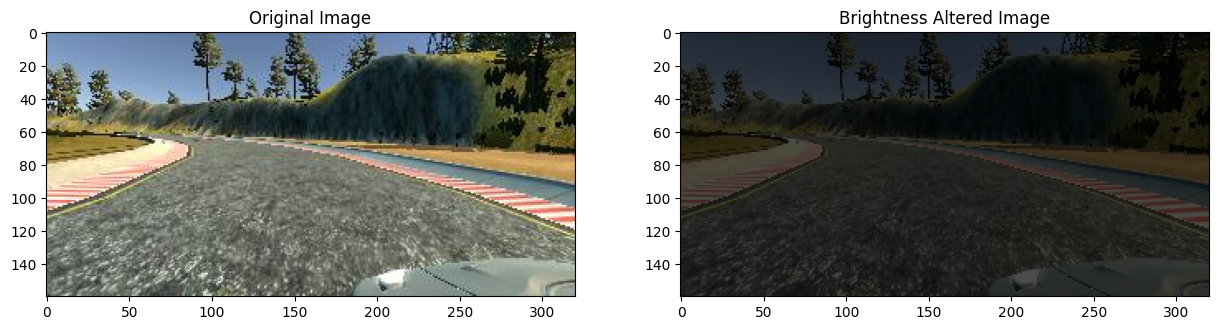

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
import glob

# Get the list of uploaded images
image_paths = glob.glob("/content/*.jpg")

# Ensure there are images before proceeding
if len(image_paths) == 0:
    print("No images found! Check your file paths.")
else:
    # Select a random image from available images
    image_path = random.choice(image_paths)
    print("Using image:", image_path)

    # Define brightness augmentation function
    def random_brightness(image):
        brightness = iaa.Multiply((0.2, 1.2))  # Randomly increase or decrease brightness
        image = brightness.augment_image(image)
        return image

    # Read and process the image
    original_image = mpimg.imread(image_path)
    brightness_altered_image = random_brightness(original_image)

    # Display the images
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")

    axs[1].imshow(brightness_altered_image)
    axs[1].set_title("Brightness Altered Image")

    plt.show()


Using image: /content/left_2021_12_19_18_46_10_430.jpg | Steering Angle: -0.8048581504840462


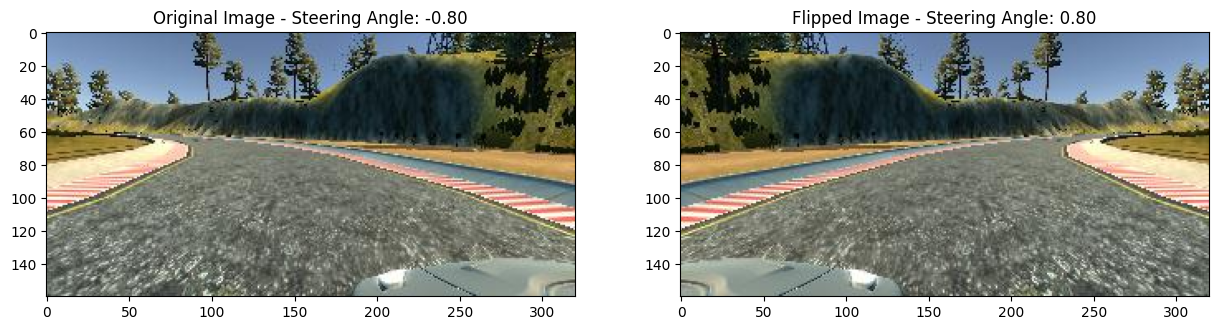

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

# Get the list of uploaded images
image_paths = glob.glob("/content/*.jpg")

# Ensure there are images before proceeding
if len(image_paths) == 0:
    print("No images found! Check your file paths.")
else:
    # Dummy steering angles (for example purposes, replace with actual values)
    steerings = [random.uniform(-1, 1) for _ in range(len(image_paths))]

    # Select a random image and its corresponding steering angle
    random_index = random.randint(0, len(image_paths) - 1)
    image_path = image_paths[random_index]
    steering_angle = steerings[random_index]

    print("Using image:", image_path, "| Steering Angle:", steering_angle)

    # Define horizontal flip function
    def random_flip(image, steering_angle):
        image = cv2.flip(image, 1)  # Flip horizontally
        steering_angle = -steering_angle  # Invert steering angle
        return image, steering_angle

    # Read and process the image
    original_image = mpimg.imread(image_path)
    flipped_image, flipped_steering_angle = random_flip(original_image, steering_angle)

    # Display original vs flipped image
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    axs[0].imshow(original_image)
    axs[0].set_title(f"Original Image - Steering Angle: {steering_angle:.2f}")

    axs[1].imshow(flipped_image)
    axs[1].set_title(f"Flipped Image - Steering Angle: {flipped_steering_angle:.2f}")

    plt.show()


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
from imgaug import augmenters as iaa

# Get all uploaded images
image_paths = glob.glob("/content/*.jpg")

# Ensure images are available
if len(image_paths) == 0:
    print("No images found! Check your file paths.")
else:
    # Dummy steering angles (Replace with real data if available)
    steerings = [random.uniform(-1, 1) for _ in range(len(image_paths))]

    # Define augmentation functions
    def pan(image):
        augmenter = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
        return augmenter.augment_image(image)

    def zoom(image):
        augmenter = iaa.Affine(scale=(1, 1.3))
        return augmenter.augment_image(image)

    def random_brightness(image):
        augmenter = iaa.Multiply((0.2, 1.2))
        return augmenter.augment_image(image)

    def random_flip(image, steering_angle):
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle
        return image, steering_angle

    # Define the random augmentation pipeline
    def random_augment(image_path, steering_angle):
        image = mpimg.imread(image_path)

        if np.random.rand() < 0.5:
            image = pan(image)
        if np.random.rand() < 0.5:
            image = zoom(image)
        if np.random.rand() < 0.5:
            image = random_brightness(image)
        if np.random.rand() < 0.5:
            image, steering_angle = random_flip(image, steering_angle)

        return image, steering_angle

    # Display multiple augmentations
    ncol, nrow = 2, 10
    fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
    fig.tight_layout()

    for i in range(nrow):
        # Select a random image and steering angle
        rand_index = np.random.choice(len(image_paths))
        random_image_path = image_paths[rand_index]
        random_steering = steerings[rand_index]

        print(f"Processing: {random_image_path} | Steering Angle: {random_steering:.2f}")

        # Load original and augmented images
        original_image = mpimg.imread(random_image_path)
        augmented_image, steering = random_augment(random_image_path, random_steering)

        # Show original image
        axs[i, 0].imshow(original_image)
        axs[i, 0].set_title("Original Image")

        # Show augmented image
        axs[i, 1].imshow(augmented_image)
        axs[i, 1].set_title("Augmented Image")

    plt.show()


Output hidden; open in https://colab.research.google.com to view.

Found 3 images.


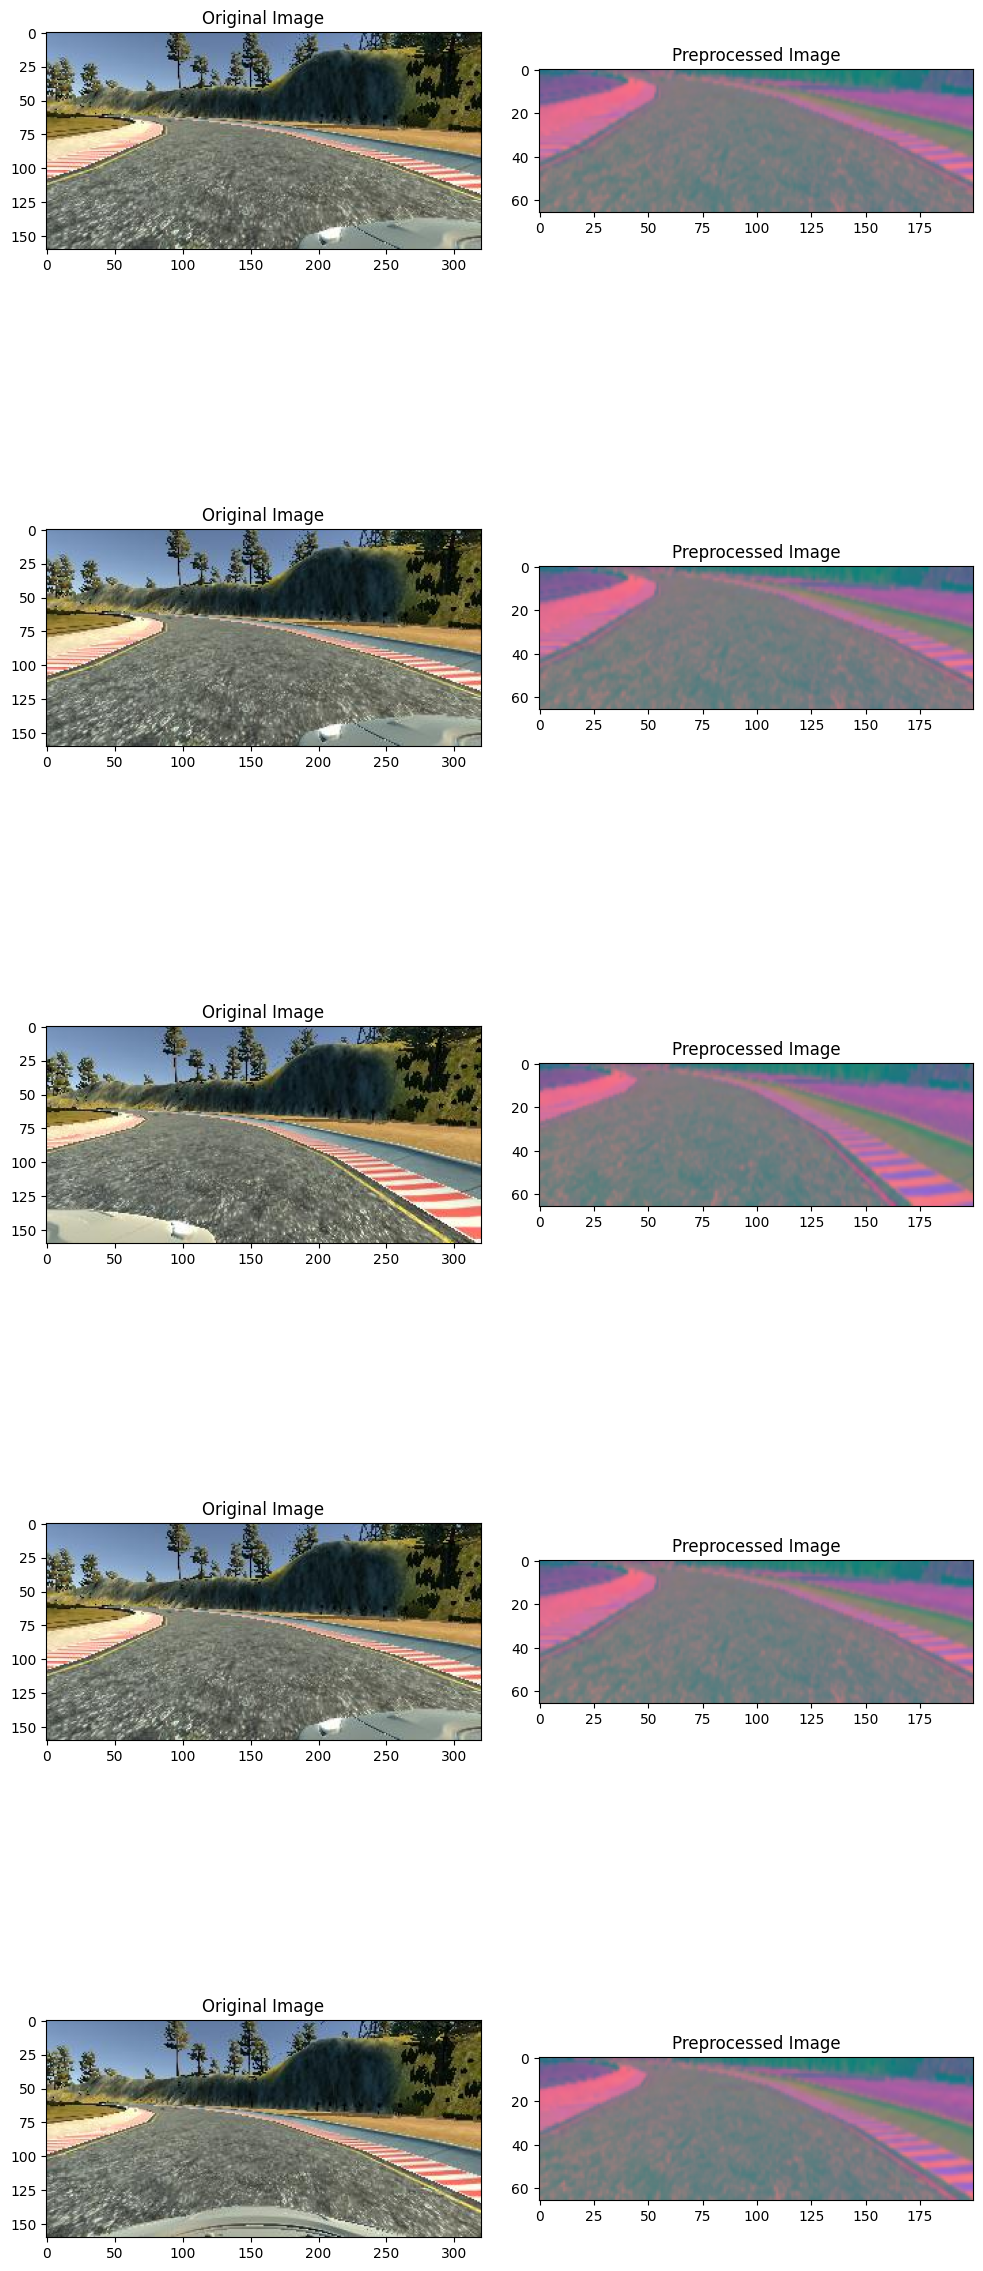

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Get all uploaded images
image_paths = glob.glob("/content/*.jpg")

if len(image_paths) == 0:
    print("No images found! Please check file paths and re-upload images.")
else:
    print(f"Found {len(image_paths)} images.")

    # Define image preprocessing function
    def img_preprocess(img):
        """Preprocesses the image: Cropping, converting to YUV, blurring, resizing, and normalizing."""
        ## Crop image to remove unnecessary parts (keep region of interest)
        img = img[60:135, :, :]
        ## Convert to YUV color space (better for training)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        ## Apply Gaussian Blur to reduce noise
        img = cv2.GaussianBlur(img, (3, 3), 0)
        ## Resize to match input size requirement (e.g., NVIDIA model uses 200x66)
        img = cv2.resize(img, (200, 66))
        ## Normalize pixel values to range [0,1]
        img = img / 255.0
        return img

    # Select and preprocess random images
    fig, axs = plt.subplots(5, 2, figsize=(10, 25))  # 5 samples, 2 columns (Original vs Processed)
    fig.tight_layout()

    for i in range(5):  # Show 5 images for visualization
        random_index = np.random.randint(0, len(image_paths))
        image_path = image_paths[random_index]

        # Load original image
        original_image = mpimg.imread(image_path)

        # Preprocess image
        processed_image = img_preprocess(original_image)

        # Plot original image
        axs[i, 0].imshow(original_image)
        axs[i, 0].set_title("Original Image")

        # Plot preprocessed image
        axs[i, 1].imshow(processed_image)
        axs[i, 1].set_title("Preprocessed Image")

    plt.show()


Found 3 images.


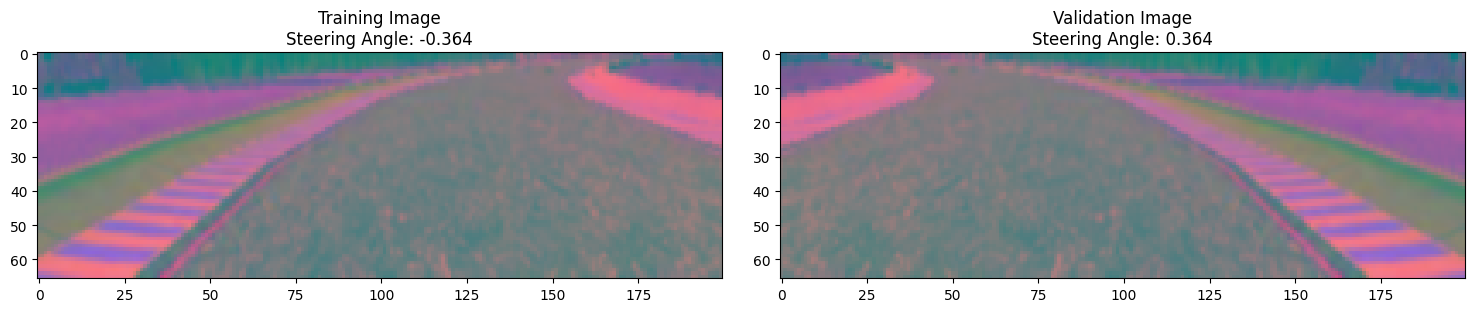

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random

# Load image file paths
image_paths = glob.glob("/content/*.jpg")

if len(image_paths) == 0:
    print("No images found! Please check file paths and re-upload images.")
else:
    print(f"Found {len(image_paths)} images.")

# Dummy steering angles (for now, generate random angles)
steerings = np.random.uniform(-1, 1, size=len(image_paths))

# Image Preprocessing Function
def img_preprocess(img):
    """Preprocess image: Crop, Convert to YUV, Blur, Resize, Normalize."""
    img = img[60:135, :, :]  # Crop the image to remove unnecessary parts
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)  # Convert to YUV color space
    img = cv2.GaussianBlur(img, (3, 3), 0)  # Apply Gaussian Blur
    img = cv2.resize(img, (200, 66))  # Resize for training
    img = img / 255.0  # Normalize
    return img

# Batch Generator Function
def batch_generator(image_paths, steerings, batch_size, is_training):
    """Generates batches of images and steering angles."""
    while True:
        batch_images = []
        batch_steerings = []

        for _ in range(batch_size):
            random_index = np.random.randint(0, len(image_paths))
            image = mpimg.imread(image_paths[random_index])  # Load image
            steering = steerings[random_index]  # Get steering angle

            # Augment only during training
            if is_training:
                if np.random.rand() < 0.5:
                    image, steering = random_flip(image, steering)

            # Preprocess image
            image = img_preprocess(image)

            batch_images.append(image)
            batch_steerings.append(steering)

        yield np.array(batch_images), np.array(batch_steerings)

# Generate a batch of images
X_train_gen, y_train_gen = next(batch_generator(image_paths, steerings, batch_size=1, is_training=True))
X_valid_gen, y_valid_gen = next(batch_generator(image_paths, steerings, batch_size=1, is_training=False))

# Plot the training and validation images
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(X_train_gen[0])
axs[0].set_title(f"Training Image\nSteering Angle: {y_train_gen[0]:.3f}")

axs[1].imshow(X_valid_gen[0])
axs[1].set_title(f"Validation Image\nSteering Angle: {y_valid_gen[0]:.3f}")

plt.show()


In [ ]:
# Install TensorFlow if not already installed (Colab already has it)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define Nvidia Model
def NvidiaModel():
    model = Sequential()
    model.add(Conv2D(24, (5,5), strides=(2,2), input_shape=(66,200,3), activation="elu"))
    model.add(Conv2D(36, (5,5), strides=(2,2), activation="elu"))
    model.add(Conv2D(48, (5,5), strides=(2,2), activation="elu"))
    model.add(Conv2D(64, (3,3), activation="elu"))
    model.add(Conv2D(64, (3,3), activation="elu"))
    model.add(Dropout(0.5))  # Avoid overfitting
    model.add(Flatten())  # Convert to 1D array for Dense layers
    model.add(Dense(100, activation="elu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="elu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="elu"))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Final output for steering angle regression
    model.compile(optimizer=Adam(learning_rate=1e-3), loss="mse")  # Fixed line here
    return model

# Create Model
model = NvidiaModel()

# Print Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 5, 22, 48)           │          43,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 20, 64)           │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 1, 18, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 18, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

